In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def moving_average(arr: list, window_size: int):
    averages  = []
    i = 0
    while i < len(arr) - window_size + 1:
    
        # Store elements from i to i+window_size
        # in list to get the current window
        window = arr[i : i + window_size]
    
        # Calculate the average of current window
        window_average = round(sum(window) / window_size, 2)
        # print(f'{window_average}/{arr[i]}')
        # Store the average of current
        # window in moving average list
        averages.append(window_average)
        
        # Shift window to right by one position
        i += 1    
    print(len(averages))
    return averages

In [3]:
data_dir = f"./data/"

In [4]:
baffle_dir = f'./test_data/baffle/'
fedrl_dir = f'./test_data/FedRLChain/'
qchain_dir = f'./test_data/qchain/'

In [5]:
baffle_mal = f'{baffle_dir}client5/{"cartpole_v0_c5_mal1_3"}.csv'
fed_mal = f'./test_data/fedrlchain/client1/{"FinishedCartPole-v0_17_09_2022-13_01_07(3620)"}.csv'
deepqrl_mal = f'./test_data/{"CartPole-v0_06_05_2022-18_21_36_mal3_d"}.csv'
datas = [deepqrl_mal,baffle_mal,fed_mal]

587
636
349


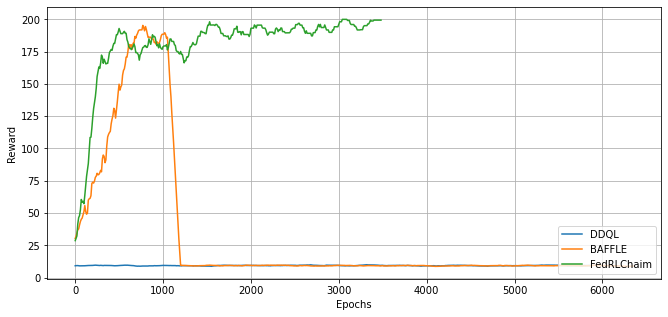

In [6]:
plt.figure(figsize=[11,5])
plt.grid()
MOVING_AVERAGE_SIZE = 15
for data in datas:
    df = pd.read_csv(data)
    # x.append(df["epoch"].values)
    # y.append(df["reward"].values)
    x,y = df["epoch"].values, df["reward"].values
    x1,y1 = x[:len(x)-MOVING_AVERAGE_SIZE+1], moving_average(y,MOVING_AVERAGE_SIZE)
    # print(x1)
    LOG_CSV = ''
    for i in range(len(x1)):
        LOG_CSV +=f'{str(x1[i])} {str(y1[i])}\n'
    LOG_CSV +='};'
    sav_instance_path = f'./test_result/{str(data)[12:18]}_mal'
    with open(sav_instance_path +'.table', 'w' ) as f:
        f.write(LOG_CSV)
    plt.plot(x1,y1,linewidth=1.5)
plt.legend(["DDQL","BAFFLE","FedRLChaim"], loc = "lower right" )
plt.xlabel("Epochs")
plt.ylabel("Reward")
plt.show()

In [7]:
plt.show()

In [8]:
def find_argmax(datas: list):
    index,max = 0,0
    for i in range(len(datas)):
        print(i,len(datas[i]))
        if len(datas[i])> max:
            max = len(datas[i])            
            index = i
    return index

In [9]:
# index = find_argmax(x)
# index